In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pymc3 as pm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import patsy

In [3]:
data = pd.DataFrame({'arm': ['A','A','A','A','A','B','B','B','B'], 'converted':[0,0,1,0,1,1,1,1,0]})

In [4]:
data

,arm,converted
0,A,0
1,A,0
2,A,1
3,A,0
4,A,1
5,B,1
6,B,1
7,B,1
8,B,0


In [5]:
with pm.Model() as test_model:
    
    A_p = pm.Uniform('A_prob', lower=0, upper=1)
    B_p = pm.Uniform('B_prob', lower=0, upper=1)

Applied interval-transform to A_prob and added transformed A_prob_interval_ to model.
Applied interval-transform to B_prob and added transformed B_prob_interval_ to model.


In [6]:
with test_model:
    
    A = pm.Bernoulli('A', p=A_p, observed=data[data.arm == "A"].converted.values)
    B = pm.Bernoulli('B', p=B_p, observed=data[data.arm == "B"].converted.values) 

In [7]:
with test_model:
    # obtain starting values via MAP
    start = pm.find_MAP()
    trace = pm.sample(10000, start=start)

Assigned NUTS to A_prob_interval_
Assigned NUTS to B_prob_interval_
100%|██████████| 10000/10000 [00:04<00:00, 2013.93it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121714990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1219baf90>]], dtype=object)

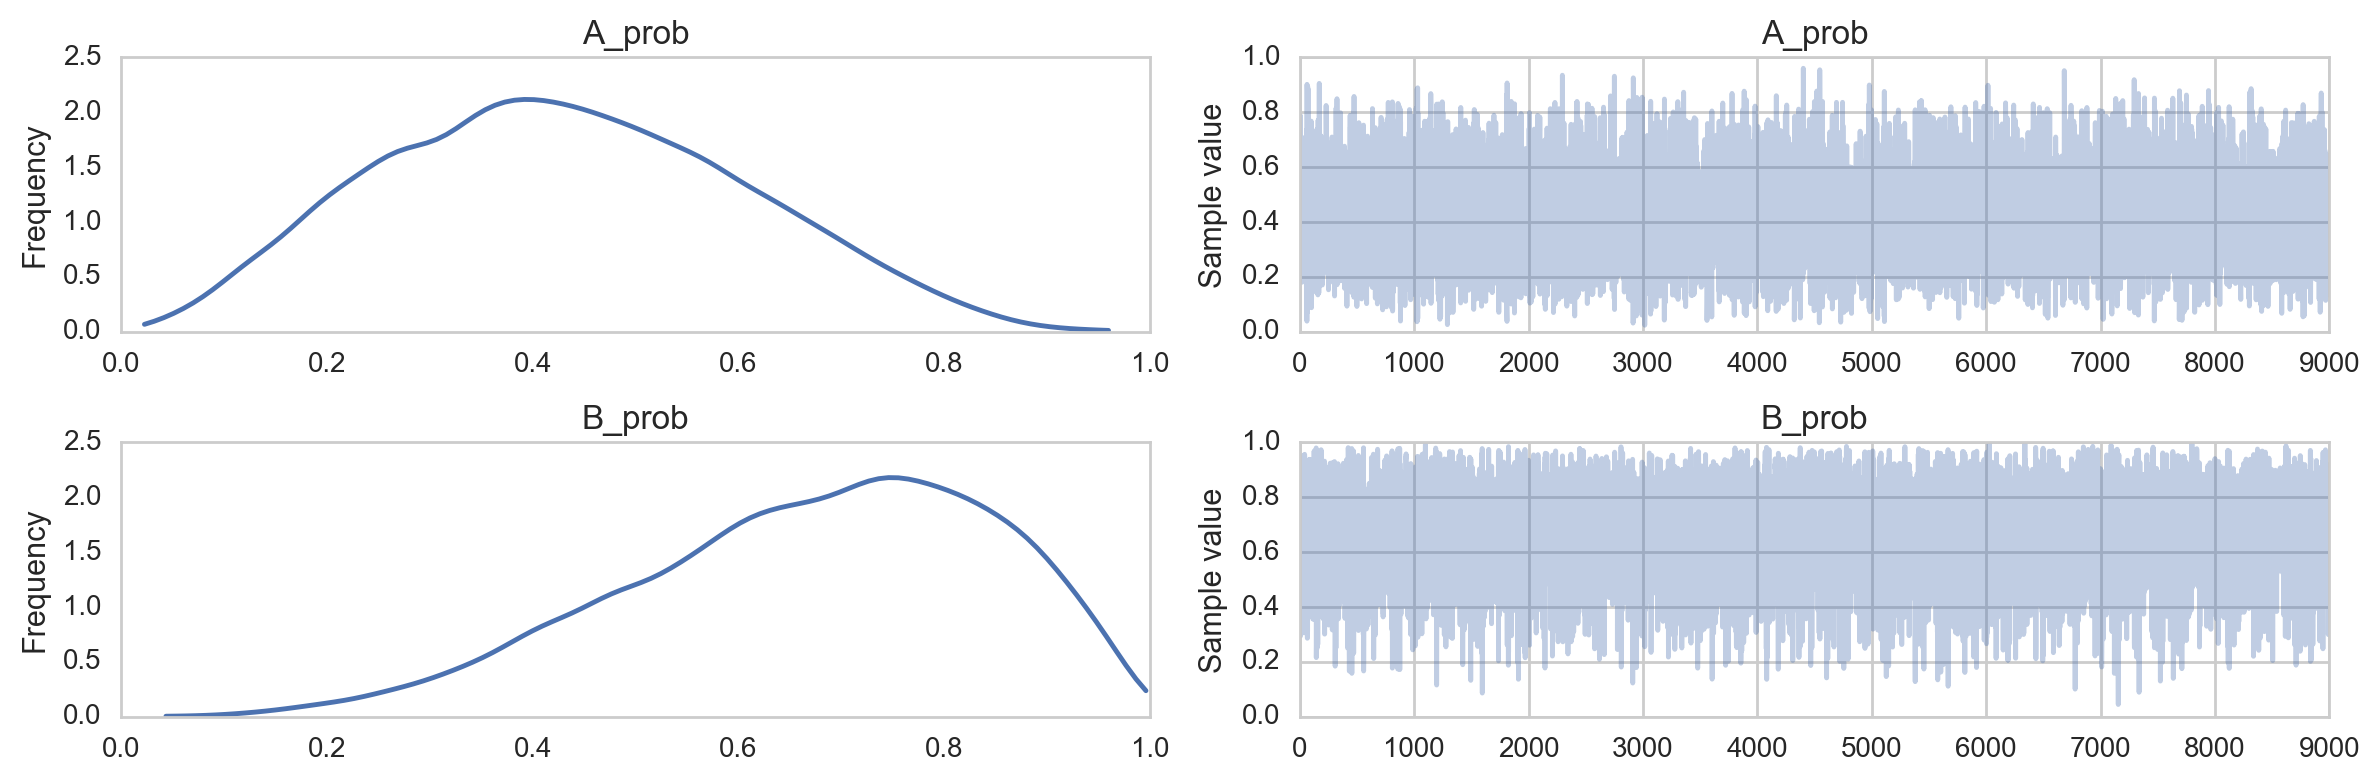

In [8]:
pm.traceplot(trace[1000:])

In [9]:
def plot_betas(beta_traces, beta_names, colors=['steelblue','darkred','goldenrod']):
    fig, ax = plt.subplots(figsize=(9,5))
    for i, bn in enumerate(beta_names):
        ax = sns.distplot(beta_traces[i], kde=True, color=colors[i], label=bn)
    ax.legend(loc='upper right')
    plt.show()

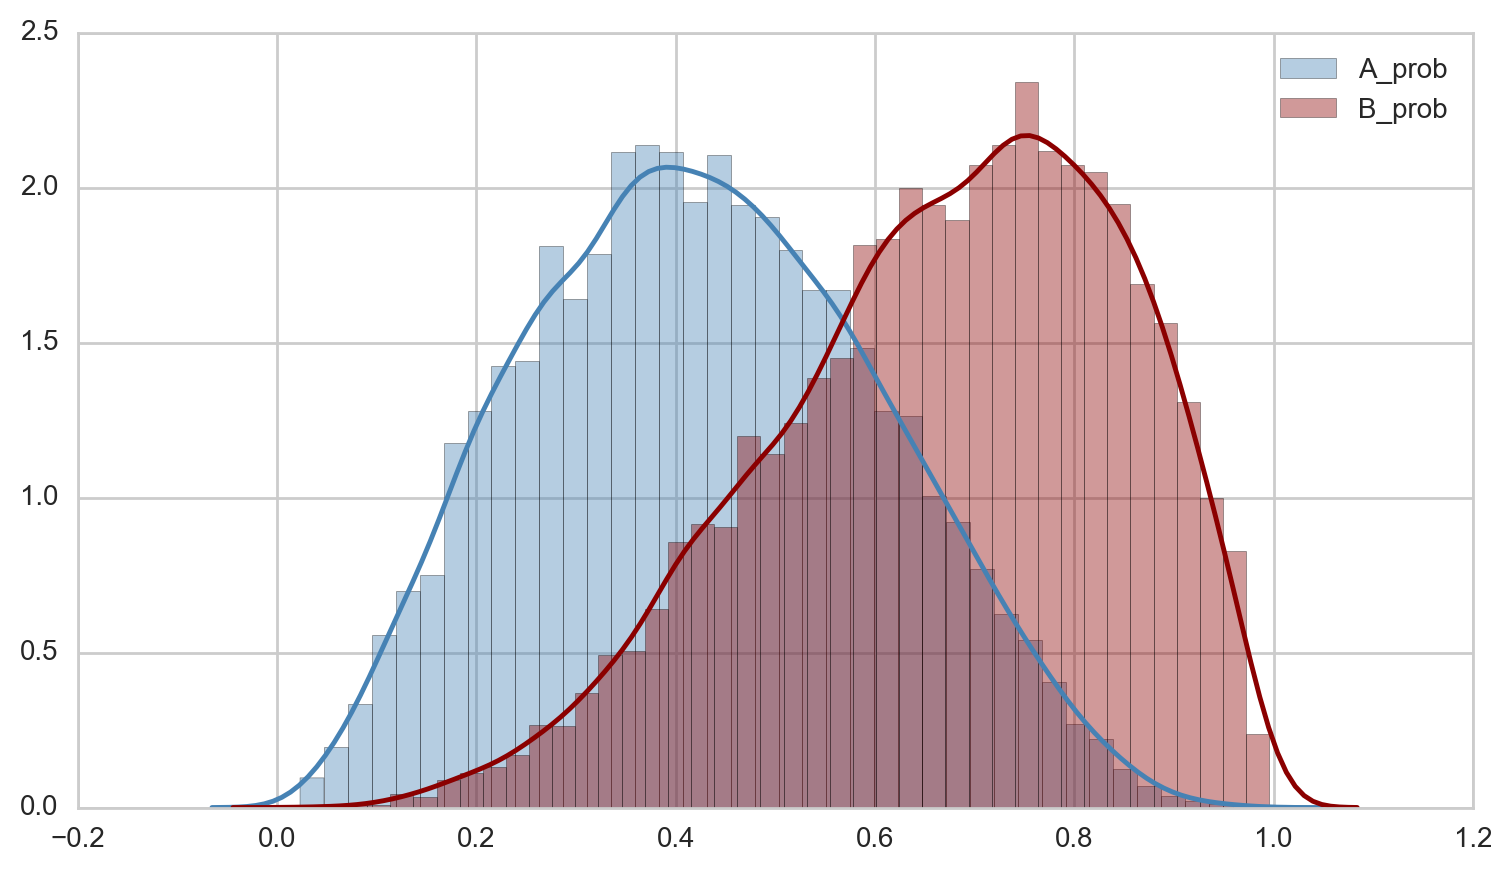

In [10]:
plot_betas([trace['A_prob'], trace['B_prob']], ['A_prob','B_prob'])